In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as ply


In [3]:
pip show wordcloud


Name: wordcloudNote: you may need to restart the kernel to use updated packages.

Version: 1.9.3
Summary: A little word cloud generator
Home-page: 
Author: 
Author-email: Andreas Mueller <t3kcit+wordcloud@gmail.com>
License: MIT License
Location: C:\Users\Vasu\anaconda3\Lib\site-packages
Requires: matplotlib, numpy, pillow
Required-by: 


In [4]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install textblob


Note: you may need to restart the kernel to use updated packages.


In [6]:
# Import wordcloud
from wordcloud import WordCloud

# Import matplotlib
import matplotlib.pyplot as plt

# Import nltk
import nltk

# Import textblob
from textblob import TextBlob

# Import seaborn
import seaborn as sns


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from nltk import word_tokenize

In [8]:
pip install --upgrade openpyxl


Note: you may need to restart the kernel to use updated packages.


In [9]:
earphone = pd.read_excel('Amazon headphone reviews.xlsx')

In [10]:
earphone.head()

ReviewTitle  \
0              Honest review of an edm music lover\n   
1              Unreliable earphones with high cost\n   
2                         Really good and durable.\n   
3                  stopped working in just 14 days\n   
4  Just Awesome Wireless Headphone under 1000...ð...   

                                          ReviewBody ReviewStar  \
0  No doubt it has a great bass and to a great ex...          3   
1  This  earphones are unreliable, i bought it be...          1   
2  i bought itfor 999,I purchased it second time,...          4   
3  Its sound quality is adorable. overall it was ...          1   
4  Its Awesome... Good sound quality & 8-9 hrs ba...          5   

            Product  price  
0  boAt Rockerz 255   1199  
1  boAt Rockerz 255   1199  
2  boAt Rockerz 255   1199  
3  boAt Rockerz 255   1199  
4  boAt Rockerz 255   1199

In [11]:
earphone['ReviewStar'].dtypes

dtype('O')

In [12]:
unique_list=[]
unique=[unique_list.append(x) for x in earphone['Product'] if x not in unique_list]
print(unique_list)

['boAt Rockerz 255', 'Product', 'JBL T205BT', 'Skullcandy S2PGHW-174', 'JBL T110BT', 'Sennheiser CX 6.0BT']


In [13]:
boat = earphone[earphone['Product']=="boAt Rockerz 255"]
skullcandy = earphone[earphone['Product']=="Skullcandy S2PGHW-174"]
jbl1 =  earphone[earphone['Product']=="JBL T110BT"]
jbl2 = earphone[earphone['Product']=="JBL T205BT"]
Sennheiser = earphone[earphone['Product']=="Sennheiser CX 6.0BT"]

In [14]:
print(boat.isna().sum())
print(skullcandy.isna().sum())
print(jbl1.isna().sum())
print(jbl2.isna().sum())
print(Sennheiser.isna().sum())

ReviewTitle    0
ReviewBody     0
ReviewStar     0
Product        0
price          0
dtype: int64
ReviewTitle    0
ReviewBody     0
ReviewStar     0
Product        0
price          0
dtype: int64
ReviewTitle    1
ReviewBody     0
ReviewStar     0
Product        0
price          0
dtype: int64
ReviewTitle    0
ReviewBody     1
ReviewStar     0
Product        0
price          0
dtype: int64
ReviewTitle    0
ReviewBody     1
ReviewStar     0
Product        0
price          0
dtype: int64


In [15]:
# Impute missing values in 'ReviewTitle' and 'ReviewBody' columns with placeholders
jbl1['ReviewTitle'].fillna('No Title', inplace=True)
jbl2['ReviewBody'].fillna('No Body', inplace=True)
Sennheiser['ReviewBody'].fillna('No Body', inplace=True)

C:\Users\Vasu\AppData\Local\Temp\ipykernel_6524\1172718751.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  jbl1['ReviewTitle'].fillna('No Title', inplace=True)
C:\Users\Vasu\AppData\Local\Temp\ipykernel_6524\1172718751.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jbl1['ReviewTitle'].fillna('No Title', inplace=True)
C:\Users\Vasu\App

In [16]:
print(boat.isna().sum())
print(skullcandy.isna().sum())
print(jbl1.isna().sum())
print(jbl2.isna().sum())
print(Sennheiser.isna().sum())

ReviewTitle    0
ReviewBody     0
ReviewStar     0
Product        0
price          0
dtype: int64
ReviewTitle    0
ReviewBody     0
ReviewStar     0
Product        0
price          0
dtype: int64
ReviewTitle    0
ReviewBody     0
ReviewStar     0
Product        0
price          0
dtype: int64
ReviewTitle    0
ReviewBody     0
ReviewStar     0
Product        0
price          0
dtype: int64
ReviewTitle    0
ReviewBody     0
ReviewStar     0
Product        0
price          0
dtype: int64


In [17]:
boat_review=boat['ReviewBody'].reset_index()

In [18]:
skullcandy_review=skullcandy ['ReviewBody'].reset_index()

In [19]:
jbl1_review=jbl1['ReviewBody'].reset_index()

In [20]:
jbl2_review=jbl2['ReviewBody'].reset_index()

In [21]:
Sennheiser_review=Sennheiser['ReviewBody'].reset_index()

In [22]:
boat_str=boat_review['ReviewBody'].str.cat(sep='')
skullcandy_str=skullcandy_review['ReviewBody'].str.cat(sep='')
jbl1_str=jbl1_review['ReviewBody'].str.cat(sep='')
jbl2_str=jbl2_review['ReviewBody'].str.cat(sep='')
Sennheiser_str= Sennheiser_review['ReviewBody'].str.cat(sep='')

In [23]:
import nltk
from nltk.corpus import stopwords

# Download the stopwords data
nltk.download('stopwords')

# Define the set of stopwords
STOPWORDS = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vasu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


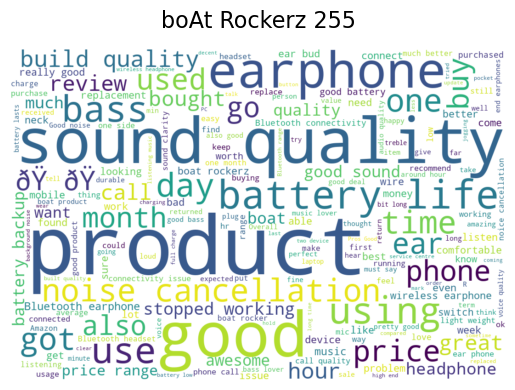

In [24]:
from wordcloud import WordCloud  # Correcting the import statement

# Assuming you have already defined `boat_str` and `STOPWORDS`
boat_wc = WordCloud(background_color='white', width=1080, height=720, stopwords=STOPWORDS).generate(boat_str)
plt.imshow(boat_wc, interpolation='bilinear')
plt.axis('off')
plt.title('boAt Rockerz 255', size=16, y=1.04)
plt.show()


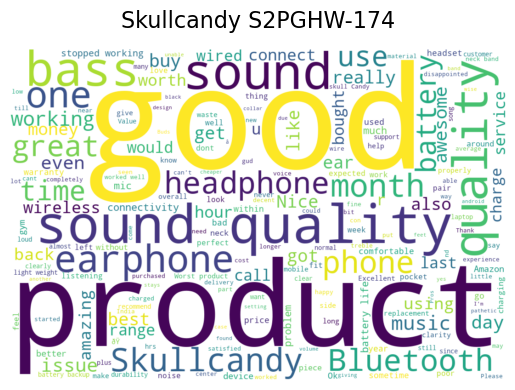

In [25]:
skullcandy_wc = WordCloud(background_color='white', width=1080, height=720, stopwords=STOPWORDS).generate(skullcandy_str)
plt.imshow(skullcandy_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Skullcandy S2PGHW-174', size=16, y=1.04)
plt.show()


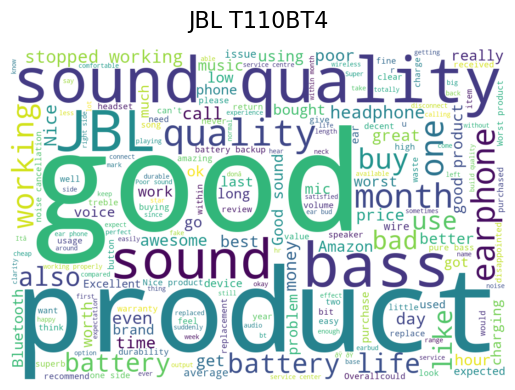

In [26]:
jbl1_wc = WordCloud(background_color='white', width=1080, height=720, stopwords=STOPWORDS).generate(jbl1_str)
plt.imshow(jbl1_wc, interpolation='bilinear')
plt.axis('off')
plt.title('JBL T110BT4', size=16, y=1.04)
plt.show()

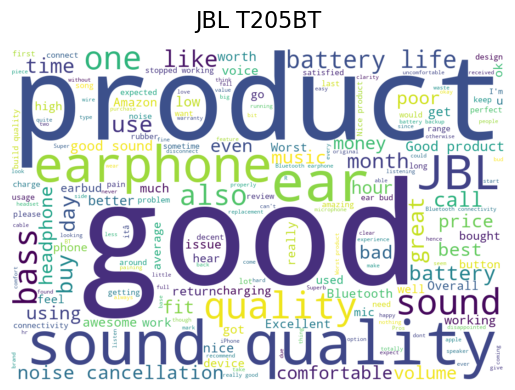

In [27]:
jbl2_wc = WordCloud(background_color='white', width=1080, height=720, stopwords=STOPWORDS).generate(jbl2_str)
plt.imshow(jbl2_wc, interpolation='bilinear')
plt.axis('off')
plt.title('JBL T205BT', size=16, y=1.04)
plt.show()

In [28]:
Sennheiser_wc = WordCloud(background_color='white', width=1080, height=720, stopwords=STOPWORDS).generate(Sennheiser_str)
plt.imshow(Sennheiser_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Sennheiser CX 6.0BT', size=16, y=1.04)
plt.show()

In [29]:
english_stopwords_re = list(ENGLISH_STOP_WORDS) + ['product', 'earphone', 'use', 'boat', 'jbl', 'skullcandy', 'Sennheiser', 'got', 'using', 'ear', 'phone', 'headphone']


In [30]:
boat_vector = TfidfVectorizer(stop_words=english_stopwords_re, ngram_range=(1,2), max_features=200, token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(boat_review['ReviewBody'])


C:\Users\Vasu\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['sennheiser'] not in stop_words.
  warnings.warn(


In [31]:
boat_vector = TfidfVectorizer(stop_words=english_stopwords_re, ngram_range=(1,2), max_features=200, token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(boat_review['ReviewBody'])


In [32]:
# Transform the text data into a TF-IDF matrix
x_b = boat_vector.transform(boat_review['ReviewBody'])

In [33]:
# Convert the sparse matrix into a DataFrame
boat_transformed = pd.DataFrame(x_b.toarray(), columns=boat_vector.get_feature_names_out())


In [34]:
# Display the transformed DataFrame
boat_transformed.head()

able  amazing    amazon  audio  average   awesome  backup       bad  base  \
0   0.0      0.0  0.000000    0.0      0.0  0.000000     0.0  0.000000   0.0   
1   0.0      0.0  0.000000    0.0      0.0  0.000000     0.0  0.000000   0.0   
2   0.0      0.0  0.000000    0.0      0.0  0.276320     0.0  0.000000   0.0   
3   0.0      0.0  0.000000    0.0      0.0  0.000000     0.0  0.000000   0.0   
4   0.0      0.0  0.397321    0.0      0.0  0.182213     0.0  0.186145   0.0   

       bass  ...  wire  wired  wireless     wires  work   working  works  \
0  0.127877  ...   0.0    0.0       0.0  0.269567   0.0  0.000000    0.0   
1  0.149680  ...   0.0    0.0       0.0  0.000000   0.0  0.000000    0.0   
2  0.000000  ...   0.0    0.0       0.0  0.000000   0.0  0.000000    0.0   
3  0.000000  ...   0.0    0.0       0.0  0.000000   0.0  0.349977    0.0   
4  0.000000  ...   0.0    0.0       0.0  0.000000   0.0  0.000000    0.0   

   worth        ðÿ  ðÿ ðÿ  
0    0.0  0.000000    0.0  
1    0.0  0.000000    0.0  
2    0.0  0.000000    0.0  
3    0.0  0.000000    0.0  
4    0.0  0.264645    0.0  

[5 rows x 200 columns]

In [35]:

skullcandy_vector = TfidfVectorizer(stop_words=english_stopwords_re, ngram_range=(1,2), max_features=200, token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(skullcandy_review['ReviewBody'])


C:\Users\Vasu\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['sennheiser'] not in stop_words.
  warnings.warn(


In [36]:
# Transform the text data into a TF-IDF matrix
x_b = skullcandy_vector.transform(skullcandy_review['ReviewBody'])

In [37]:
skullcandy_transformed = pd.DataFrame(x_b.toarray(), columns=skullcandy_vector.get_feature_names_out())


In [38]:
skullcandy_transformed.head()

able   amazing  amazing sound  amazon  automatically  average  awesome  \
0   0.0  0.000000       0.000000     0.0            0.0      0.0      0.0   
1   0.0  0.198160       0.000000     0.0            0.0      0.0      0.0   
2   0.0  0.000000       0.000000     0.0            0.0      0.0      0.0   
3   0.0  0.347156       0.423219     0.0            0.0      0.0      0.0   
4   0.0  0.000000       0.000000     0.0            0.0      0.0      0.0   

     backup  bad      band  ...  worked  working  working months  \
0  0.000000  0.0  0.508097  ...     0.0      0.0             0.0   
1  0.000000  0.0  0.000000  ...     0.0      0.0             0.0   
2  0.000000  0.0  0.000000  ...     0.0      0.0             0.0   
3  0.000000  0.0  0.000000  ...     0.0      0.0             0.0   
4  0.234403  0.0  0.000000  ...     0.0      0.0             0.0   

   working properly  works  worst     worth  worth money  year   ðÿ  
0               0.0    0.0    0.0  0.000000          0.0   0.0  0.0  
1               0.0    0.0    0.0  0.190516          0.0   0.0  0.0  
2               0.0    0.0    0.0  0.000000          0.0   0.0  0.0  
3               0.0    0.0    0.0  0.000000          0.0   0.0  0.0  
4               0.0    0.0    0.0  0.000000          0.0   0.0  0.0  

[5 rows x 200 columns]

In [39]:
jbl1_vector = TfidfVectorizer(stop_words=english_stopwords_re, ngram_range=(1,2), max_features=200, token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(jbl1_review['ReviewBody'])


C:\Users\Vasu\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['sennheiser'] not in stop_words.
  warnings.warn(


In [40]:
# Transform the text data into a TF-IDF matrix
x_b = jbl1_vector.transform(jbl1_review['ReviewBody'])
jbl1_transformed = pd.DataFrame(x_b.toarray(), columns=jbl1_vector.get_feature_names_out())
jbl1_transformed.head()

amazing  amazon     audio  available   average  awesome  backup      bad  \
0      0.0     0.0  0.346287        0.0  0.000000      0.0     0.0  0.00000   
1      0.0     0.0  0.000000        0.0  0.000000      0.0     0.0  0.00000   
2      0.0     0.0  0.000000        0.0  0.000000      0.0     0.0  0.00000   
3      0.0     0.0  0.000000        0.0  0.271309      0.0     0.0  0.00000   
4      0.0     0.0  0.000000        0.0  0.000000      0.0     0.0  0.17538   

   base      bass  ...  working  working month  working months  \
0   0.0  0.192048  ...      0.0            0.0             0.0   
1   0.0  0.000000  ...      0.0            0.0             0.0   
2   0.0  0.000000  ...      0.0            0.0             0.0   
3   0.0  0.083120  ...      0.0            0.0             0.0   
4   0.0  0.000000  ...      0.0            0.0             0.0   

   working properly  works  worst     worth  year   ðÿ  ðÿ ðÿ  
0               0.0    0.0    0.0  0.279298   0.0  0.0    0.0  
1               0.0    0.0    0.0  0.000000   0.0  0.0    0.0  
2               0.0    0.0    0.0  0.000000   0.0  0.0    0.0  
3               0.0    0.0    0.0  0.000000   0.0  0.0    0.0  
4               0.0    0.0    0.0  0.000000   0.0  0.0    0.0  

[5 rows x 200 columns]

In [41]:
jbl2_vector = TfidfVectorizer(stop_words=english_stopwords_re, ngram_range=(1,2), max_features=200, token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(jbl2_review['ReviewBody'])

C:\Users\Vasu\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['sennheiser'] not in stop_words.
  warnings.warn(


In [42]:
# Transform the text data into a TF-IDF matrix
x_b = jbl2_vector.transform(jbl2_review['ReviewBody'])
jbl2_transformed = pd.DataFrame(x_b.toarray(), columns=jbl2_vector.get_feature_names_out())
jbl2_transformed.head()

able  amazing  amazon     apple   average  awesome  backup  bad  base  \
0   0.0      0.0     0.0  0.042527  0.000000      0.0     0.0  0.0   0.0   
1   0.0      0.0     0.0  0.000000  0.000000      0.0     0.0  0.0   0.0   
2   0.0      0.0     0.0  0.000000  0.184299      0.0     0.0  0.0   0.0   
3   0.0      0.0     0.0  0.000000  0.186848      0.0     0.0  0.0   0.0   
4   0.0      0.0     0.0  0.000000  0.000000      0.0     0.0  0.0   0.0   

       bass  ...      wire  wireless       won      work  working  works  \
0  0.225185  ...  0.000000  0.043312  0.045151  0.041151      0.0    0.0   
1  0.000000  ...  0.000000  0.000000  0.000000  0.000000      0.0    0.0   
2  0.000000  ...  0.213914  0.000000  0.000000  0.000000      0.0    0.0   
3  0.000000  ...  0.000000  0.000000  0.000000  0.000000      0.0    0.0   
4  0.000000  ...  0.000000  0.000000  0.202963  0.000000      0.0    0.0   

   worst     worth  worth money        ðÿ  
0    0.0  0.000000     0.000000  0.000000  
1    0.0  0.000000     0.000000  0.000000  
2    0.0  0.161589     0.221577  0.000000  
3    0.0  0.000000     0.000000  0.214585  
4    0.0  0.000000     0.000000  0.198601  

[5 rows x 200 columns]

In [43]:
Sennheiser_vector=TfidfVectorizer(stop_words=english_stopwords_re, ngram_range=(1,2), max_features=200, token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(Sennheiser_review['ReviewBody'])

C:\Users\Vasu\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['sennheiser'] not in stop_words.
  warnings.warn(


In [44]:
# Transform the text data into a TF-IDF matrix
x_b = jbl2_vector.transform(Sennheiser_review['ReviewBody'])
Sennheiser_transformed = pd.DataFrame(x_b.toarray(), columns=Sennheiser_vector.get_feature_names_out())
Sennheiser_transformed.head()

amazing  amazon  audio  awesome  bad  balance  balanced  base  bass  \
0  0.000000     0.0    0.0      0.0  0.0      0.0       0.0   0.0   0.0   
1  0.000000     0.0    0.0      0.0  0.0      0.0       0.0   0.0   0.0   
2  0.000000     0.0    0.0      0.0  0.0      0.0       0.0   0.0   0.0   
3  0.244533     0.0    0.0      0.0  0.0      0.0       0.0   0.0   0.0   
4  0.000000     0.0    0.0      0.0  0.0      0.0       0.0   0.0   0.0   

       best  ...     wires  work  worked  working  works     worth  writing  \
0  0.000000  ...  0.202340   0.0     0.0      0.0    0.0  0.000000      0.0   
1  0.246706  ...  0.391348   0.0     0.0      0.0    0.0  0.000000      0.0   
2  0.000000  ...  0.000000   0.0     0.0      0.0    0.0  0.000000      0.0   
3  0.000000  ...  0.122266   0.0     0.0      0.0    0.0  0.123634      0.0   
4  0.110403  ...  0.175131   0.0     0.0      0.0    0.0  0.000000      0.0   

   year  years  years warranty  
0   0.0    0.0        0.200206  
1   0.0    0.0        0.000000  
2   0.0    0.0        0.000000  
3   0.0    0.0        0.000000  
4   0.0    0.0        0.000000  

[5 rows x 200 columns]

In [45]:
boat_score=boat['ReviewBody']
boat_score.head()

0    No doubt it has a great bass and to a great ex...
1    This  earphones are unreliable, i bought it be...
2    i bought itfor 999,I purchased it second time,...
3    Its sound quality is adorable. overall it was ...
4    Its Awesome... Good sound quality & 8-9 hrs ba...
Name: ReviewBody, dtype: object

In [46]:
Sennheiser_score=Sennheiser['ReviewBody']
Sennheiser_score.head()

8546    Bought these headphones in September 2016. the...
8547    Very good balance in bass and treble. Reflecti...
8548            One of the best headphone in my budget.\n
8549    I usually don't write reviews, but I've bought...
8550    I have used wide ranges of earphones over year...
Name: ReviewBody, dtype: object

In [47]:
jbl1_score=jbl1['ReviewBody']
jbl1_score.head()

6624    Please do not buy this. Wired earphones worth ...
6625    Not a good one .I have been using it from last...
6626    Dont buy it very uselesss item in very high co...
6627    Got it in a deal for 1899/- and here are my th...
6628    Never buy this product...I personally suffer a...
Name: ReviewBody, dtype: object

In [48]:
jbl2_score=jbl2['ReviewBody']
jbl2_score.head()

4974    I was looking for a budget friendly wireless e...
4975    Even though, the Sound Quality and In Ear desi...
4976    Points:*Good & comfortable  for big ears.*Easy...
4977    ðŸ”‹ Battery Life: Average>HighðŸ”ŠSound Quali...
4978    I'm not happy with this product. If you've use...
Name: ReviewBody, dtype: object

In [49]:
skullcandy_score=skullcandy['ReviewBody']
skullcandy_score.head()

6385    Skullcandy makes affordable quality products. ...
6386    The ones that i have are amazing , the charge ...
6387    Many time it is unable to pair with more than ...
6388    Amazing product,  sound quality is good.The be...
6389    Battery backup is fair as mentioned.Design is ...
Name: ReviewBody, dtype: object

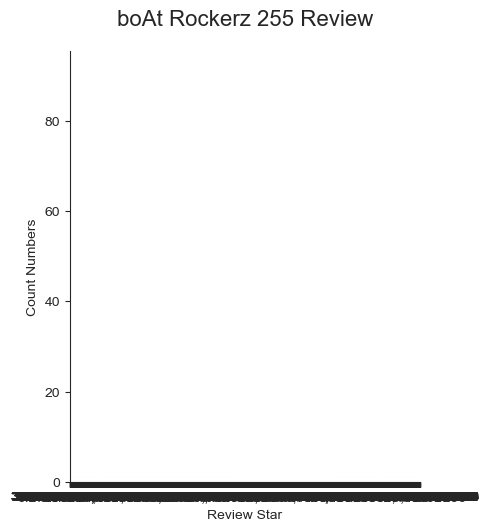

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('ticks')
sns.catplot(x='ReviewStar', data=boat, kind='count')
sns.set_context("notebook")
plt.title('boAt Rockerz 255 Review', size=16, y=1.04)
plt.xlabel('Review Star')
plt.ylabel('Count Numbers')
plt.show()



In [51]:
# Create a count plot of the number of reviews for each star rating
sns.catplot(x='ReviewStar', data=skullcandy, kind='count')

# Rotate x labels to prevent overlapping
plt.xticks(rotation=45)  

# Add a title and labels
plt.title('Skullcandy S2PGHW-174 Review', size=16, y=1.04)
plt.xlabel('Review Star')
plt.ylabel('Count Numbers')

# Show the plot
plt.show()

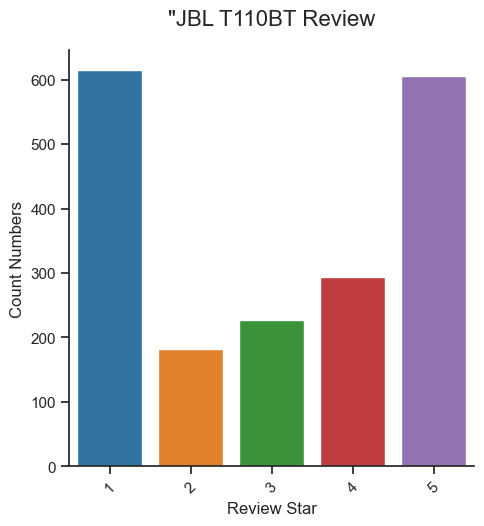

In [52]:
# Create a count plot of the number of reviews for each star rating
sns.catplot(x='ReviewStar', data=jbl1, kind='count')

# Rotate x labels to prevent overlapping
plt.xticks(rotation=45)  

# Add a title and labels
plt.title('"JBL T110BT Review', size=16, y=1.04)
plt.xlabel('Review Star')
plt.ylabel('Count Numbers')

# Show the plot
plt.show()

In [53]:
# Create a count plot of the number of reviews for each star rating
sns.catplot(x='ReviewStar', data=jbl2, kind='count')

# Rotate x labels to prevent overlapping
plt.xticks(rotation=45)  

# Add a title and labels
plt.title('"JBL T205BT Review', size=16, y=1.04)
plt.xlabel('Review Star')
plt.ylabel('Count Numbers')

# Show the plot
plt.show()

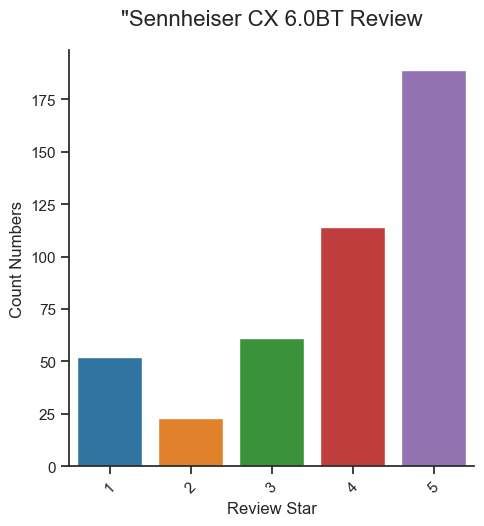

In [54]:
# Create a count plot of the number of reviews for each star rating
sns.catplot(x='ReviewStar', data=Sennheiser, kind='count')

# Rotate x labels to prevent overlapping
plt.xticks(rotation=45)  

# Add a title and labels
plt.title('"Sennheiser CX 6.0BT Review', size=16, y=1.04)
plt.xlabel('Review Star')
plt.ylabel('Count Numbers')

# Show the plot
plt.show()

In [55]:
# Assuming 'ReviewBody' contains the text data in your DataFrame
boat['tokens'] = boat['ReviewBody'].apply(lambda x: len(x.split()))

C:\Users\Vasu\AppData\Local\Temp\ipykernel_6524\3534249847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boat['tokens'] = boat['ReviewBody'].apply(lambda x: len(x.split()))


In [56]:

# Create a violin plot of word count distribution for each star rating
sns.violinplot(x='ReviewStar', y='tokens', data=boat)
sns.set_context("notebook")
plt.title('boAt Rockerz 255 - Word Count v.s. Review Stars', size=16, y=1.04)
plt.xlabel('Review Star')
plt.ylabel('Word Count')
plt.show()

C:\Users\Vasu\AppData\Local\Temp\ipykernel_6524\1876508271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skullcandy['tokens'] = skullcandy['ReviewBody'].apply(lambda x: len(x.split()))


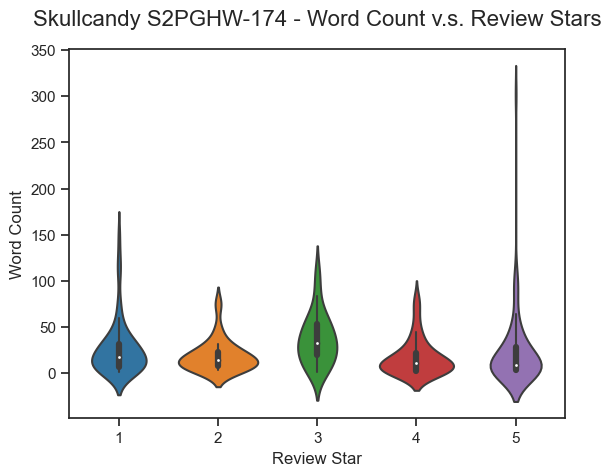

In [57]:
# Assuming 'ReviewBody' contains the text data in your DataFrame
skullcandy['tokens'] = skullcandy['ReviewBody'].apply(lambda x: len(x.split()))

# Create a violin plot of word count distribution for each star rating
sns.violinplot(x='ReviewStar', y='tokens', data=skullcandy)
sns.set_context("notebook")
plt.title('Skullcandy S2PGHW-174 - Word Count v.s. Review Stars', size=16, y=1.04)
plt.xlabel('Review Star')
plt.ylabel('Word Count')
plt.show()


C:\Users\Vasu\AppData\Local\Temp\ipykernel_6524\3729704479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jbl1['tokens'] = jbl1['ReviewBody'].apply(lambda x: len(x.split()))


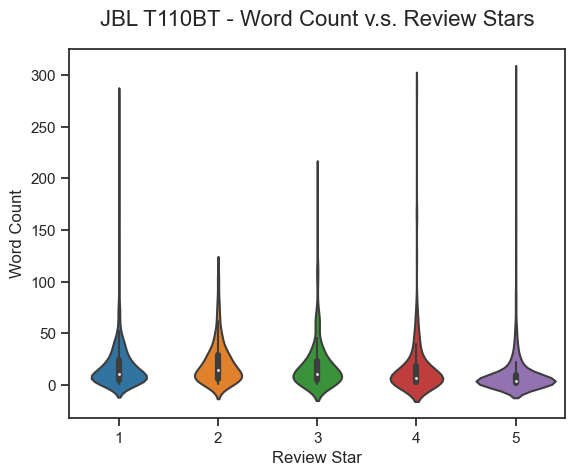

In [58]:
# Assuming 'ReviewBody' contains the text data in your DataFrame
jbl1['tokens'] = jbl1['ReviewBody'].apply(lambda x: len(x.split()))

# Create a violin plot of word count distribution for each star rating
sns.violinplot(x='ReviewStar', y='tokens', data=jbl1)

# Add a title and labels
plt.title('JBL T110BT - Word Count v.s. Review Stars', size=16, y=1.04)
plt.xlabel('Review Star')
plt.ylabel('Word Count')
plt.show()


C:\Users\Vasu\AppData\Local\Temp\ipykernel_6524\3140574753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jbl2['tokens'] = jbl2['ReviewBody'].apply(lambda x: len(x.split()))


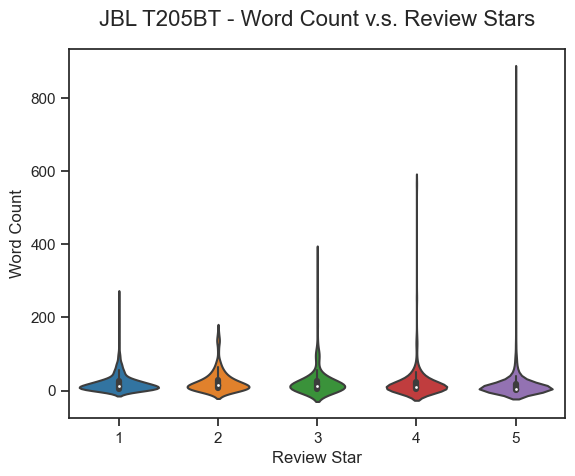

In [59]:
# Assuming 'ReviewBody' contains the text data in your DataFrame
jbl2['tokens'] = jbl2['ReviewBody'].apply(lambda x: len(x.split()))

# Create a violin plot of word count distribution for each star rating
sns.violinplot(x='ReviewStar', y='tokens', data=jbl2)

# Add a title and labels
plt.title('JBL T205BT - Word Count v.s. Review Stars', size=16, y=1.04)
plt.xlabel('Review Star')
plt.ylabel('Word Count')
plt.show()


In [60]:
# Assuming 'ReviewBody' contains the text data in your DataFrame
Sennheiser['tokens'] = Sennheiser['ReviewBody'].apply(lambda x: len(x.split()))

# Create a violin plot of word count distribution for each star rating
sns.violinplot(x='ReviewStar', y='tokens', data=Sennheiser)

# Add a title and labels
plt.title('Sennheiser CX 6.0BT   - Word Count v.s. Review Stars', size=16, y=1.04)
plt.xlabel('Review Star')
plt.ylabel('Word Count')
plt.show()


C:\Users\Vasu\AppData\Local\Temp\ipykernel_6524\1887999880.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sennheiser['tokens'] = Sennheiser['ReviewBody'].apply(lambda x: len(x.split()))


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming boat_transformed is your feature matrix and boat_score is your target array

# Splitting the data into training and testing sets
x_train_b, x_test_b, y_train_b, y_test_b = train_test_split(boat_transformed, boat_score, test_size=0.2, random_state=90)

# Training the logistic regression model
logistic_regression = LogisticRegression().fit(x_train_b, y_train_b)

# Making predictions
y_predicted_b = logistic_regression.predict(x_test_b)


In [62]:
# Evaluate model performance
accuracy = accuracy_score(y_test_b, y_predicted_b)
confusion_matrix_result = confusion_matrix(y_test_b, y_predicted_b)
classification_report_result = classification_report(y_test_b, y_predicted_b)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix_result)
print("Classification Report:\n", classification_report_result)


Accuracy: 0.9939577039274925
Confusion Matrix:
 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]
Classification Report:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

C:\Users\Vasu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vasu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vasu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix_result)
print("Classification Report:\n", classification_report_result)

Accuracy: 0.9939577039274925
Confusion Matrix:
 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]
Classification Report:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [64]:
boat_transformed

able  amazing    amazon  audio  average   awesome  backup       bad  \
0      0.0      0.0  0.000000    0.0      0.0  0.000000     0.0  0.000000   
1      0.0      0.0  0.000000    0.0      0.0  0.000000     0.0  0.000000   
2      0.0      0.0  0.000000    0.0      0.0  0.276320     0.0  0.000000   
3      0.0      0.0  0.000000    0.0      0.0  0.000000     0.0  0.000000   
4      0.0      0.0  0.397321    0.0      0.0  0.182213     0.0  0.186145   
...    ...      ...       ...    ...      ...       ...     ...       ...   
4956   0.0      0.0  0.000000    0.0      0.0  0.000000     0.0  0.000000   
4957   0.0      0.0  0.000000    0.0      0.0  0.000000     0.0  0.000000   
4958   0.0      0.0  0.000000    0.0      0.0  0.000000     0.0  0.000000   
4959   0.0      0.0  0.000000    0.0      0.0  0.000000     0.0  0.000000   
4960   0.0      0.0  0.000000    0.0      0.0  0.000000     0.0  0.000000   

      base      bass  ...  wire  wired  wireless     wires      work  \
0      0.0  0.127877  ...   0.0    0.0  0.000000  0.269567  0.000000   
1      0.0  0.149680  ...   0.0    0.0  0.000000  0.000000  0.000000   
2      0.0  0.000000  ...   0.0    0.0  0.000000  0.000000  0.000000   
3      0.0  0.000000  ...   0.0    0.0  0.000000  0.000000  0.000000   
4      0.0  0.000000  ...   0.0    0.0  0.000000  0.000000  0.000000   
...    ...       ...  ...   ...    ...       ...       ...       ...   
4956   0.0  0.000000  ...   0.0    0.0  0.000000  0.000000  0.000000   
4957   0.0  0.134044  ...   0.0    0.0  0.225122  0.000000  0.000000   
4958   0.0  0.000000  ...   0.0    0.0  0.000000  0.000000  0.368439   
4959   0.0  0.000000  ...   0.0    0.0  0.000000  0.000000  0.000000   
4960   0.0  0.180836  ...   0.0    0.0  0.000000  0.000000  0.000000   

       working  works  worth        ðÿ  ðÿ ðÿ  
0     0.000000    0.0    0.0  0.000000    0.0  
1     0.000000    0.0    0.0  0.000000    0.0  
2     0.000000    0.0    0.0  0.000000    0.0  
3     0.349977    0.0    0.0  0.000000    0.0  
4     0.000000    0.0    0.0  0.264645    0.0  
...        ...    ...    ...       ...    ...  
4956  0.000000    0.0    0.0  0.000000    0.0  
4957  0.000000    0.0    0.0  0.000000    0.0  
4958  0.000000    0.0    0.0  0.000000    0.0  
4959  0.000000    0.0    0.0  0.000000    0.0  
4960  0.000000    0.0    0.0  0.000000    0.0  

[4961 rows x 200 columns]

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming boat_transformed is your feature matrix and boat_score is your target array

# Splitting the data into training and testing sets
x_train_b, x_test_b, y_train_b, y_test_b = train_test_split(skullcandy_transformed, skullcandy_score, test_size=0.2, random_state=151)

# Training the logistic regression model
logistic_regression = LogisticRegression().fit(x_train_b, y_train_b)

# Making predictions
y_predicted_b = logistic_regression.predict(x_test_b)

# Evaluate model performance
accuracy = accuracy_score(y_test_b, y_predicted_b)
confusion_matrix_result = confusion_matrix(y_test_b, y_predicted_b)
classification_report_result = classification_report(y_test_b, y_predicted_b)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix_result)
print("Classification Report:\n", classification_report_result)


Accuracy: 0.0
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     precision    recall  f1-score   support

                                                                                                                                          

C:\Users\Vasu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vasu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vasu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vasu\anaconda3\Lib\site-packages\sklearn\metrics\_classif

In [66]:
model_lr=LogisticRegression(multi_class='ovr')

In [67]:
boat_transformed.head()

able  amazing    amazon  audio  average   awesome  backup       bad  base  \
0   0.0      0.0  0.000000    0.0      0.0  0.000000     0.0  0.000000   0.0   
1   0.0      0.0  0.000000    0.0      0.0  0.000000     0.0  0.000000   0.0   
2   0.0      0.0  0.000000    0.0      0.0  0.276320     0.0  0.000000   0.0   
3   0.0      0.0  0.000000    0.0      0.0  0.000000     0.0  0.000000   0.0   
4   0.0      0.0  0.397321    0.0      0.0  0.182213     0.0  0.186145   0.0   

       bass  ...  wire  wired  wireless     wires  work   working  works  \
0  0.127877  ...   0.0    0.0       0.0  0.269567   0.0  0.000000    0.0   
1  0.149680  ...   0.0    0.0       0.0  0.000000   0.0  0.000000    0.0   
2  0.000000  ...   0.0    0.0       0.0  0.000000   0.0  0.000000    0.0   
3  0.000000  ...   0.0    0.0       0.0  0.000000   0.0  0.349977    0.0   
4  0.000000  ...   0.0    0.0       0.0  0.000000   0.0  0.000000    0.0   

   worth        ðÿ  ðÿ ðÿ  
0    0.0  0.000000    0.0  
1    0.0  0.000000    0.0  
2    0.0  0.000000    0.0  
3    0.0  0.000000    0.0  
4    0.0  0.264645    0.0  

[5 rows x 200 columns]

In [68]:
boat_reviews=earphone[earphone['Product']=="boAt Rockerz 255"]['ReviewStar']

In [69]:
boat_reviews.value_counts()

ReviewStar
4.000000    91
5.000000    91
1.000000    82
3.000000    59
2.000000    36
            ..
3.599462     1
3.599693     1
3.599923     1
3.600154     1
4.305698     1
Name: count, Length: 4607, dtype: int64

In [70]:
xtrain, xtest, ytrain , ytest=train_test_split(boat_transformed, boat_reviews, test_size=0.2, random_state=100)

In [71]:
ytrain

4792    4.263965
2157    3.658257
4671    4.236297
1321    3.465962
596      3.29926
          ...   
4160    4.118706
1895    3.597848
350            5
79             1
3937    4.067519
Name: ReviewStar, Length: 3968, dtype: object

In [72]:
pip install gensim nltk


Note: you may need to restart the kernel to use updated packages.


In [73]:
import pandas as pd
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import nltk
from nltk.corpus import stopwords

In [74]:
import pandas as pd
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vasu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [75]:
earphone = pd.DataFrame(earphone)
reviews = earphone['ReviewBody'].values.tolist()


In [76]:
# Preprocess the reviews
def preprocess(text):
    if isinstance(text, str):
        return [word for word in simple_preprocess(text) if word not in stopwords.words('english')]
    else:
        return []


In [77]:
processed_reviews = [preprocess(review) for review in reviews]


In [78]:
# Create Dictionary and Corpus
id2word = corpora.Dictionary(processed_reviews)
corpus = [id2word.doc2bow(text) for text in processed_reviews]


In [79]:
# Build LDA Model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=2,  # Adjust the number of topics as needed
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [80]:
# Print the Keywords in the Topics
from pprint import pprint
pprint(lda_model.print_topics())

[(0,
  '0.035*"good" + 0.029*"quality" + 0.028*"sound" + 0.016*"bass" + '
  '0.014*"battery" + 0.012*"product" + 0.010*"earphones" + 0.010*"music" + '
  '0.009*"one" + 0.008*"ear"'),
 (1,
  '0.027*"product" + 0.016*"sound" + 0.015*"quality" + 0.014*"good" + '
  '0.012*"one" + 0.010*"bass" + 0.010*"earphones" + 0.009*"working" + '
  '0.008*"battery" + 0.007*"months"')]


In [81]:
# Format the topics for easier viewing
topics = lda_model.show_topics(formatted=False)
for topic in topics:
    print(f"Topic {topic[0]}: {[word for word, _ in topic[1]]}")


Topic 0: ['good', 'quality', 'sound', 'bass', 'battery', 'product', 'earphones', 'music', 'one', 'ear']
Topic 1: ['product', 'sound', 'quality', 'good', 'one', 'bass', 'earphones', 'working', 'battery', 'months']


In [82]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. Lower is better.



Perplexity:  -6.8087413352856405


In [83]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_reviews, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.45020306886775674


In [84]:
from nltk.stem import WordNetLemmatizer

# Create an instance of the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Now you can use the lemmatizer object
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vasu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vasu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [85]:
# Preprocess the reviews
def preprocess(text):
    if isinstance(text, str):
        return [lemmatizer.lemmatize(word) for word in simple_preprocess(text) if word not in stopwords.words('english')]
    else:
        return []

processed_reviews = [preprocess(review) for review in reviews]

# Create Dictionary and Corpus
id2word = corpora.Dictionary(processed_reviews)

# Filter out extremes to remove too frequent and too rare words
id2word.filter_extremes(no_below=2, no_above=0.5)

corpus = [id2word.doc2bow(text) for text in processed_reviews]

# Function to compute coherence score for a given number of topics
def compute_coherence_values(corpus, dictionary, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=num_topics,
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           iterations=400,
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# Compute coherence values for different number of topics
model_list, coherence_values = compute_coherence_values(corpus=corpus, dictionary=id2word, texts=processed_reviews, start=2, limit=10, step=1)

# Print coherence values for each number of topics
for num_topics, coherence_value in enumerate(coherence_values, start=2):
    print(f'Num Topics: {num_topics}, Coherence Score: {coherence_value}')

# Select the model with the highest coherence score
optimal_model = model_list[coherence_values.index(max(coherence_values))]
pprint(optimal_model.print_topics())

# Compute and print the coherence score of the optimal model
coherence_model_lda = CoherenceModel(model=optimal_model, texts=processed_reviews, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nOptimal Model Coherence Score: ', coherence_lda)

Num Topics: 2, Coherence Score: 0.5129332607332775
Num Topics: 3, Coherence Score: 0.5025505298226528
Num Topics: 4, Coherence Score: 0.512118149080355
Num Topics: 5, Coherence Score: 0.4811118404632987
Num Topics: 6, Coherence Score: 0.4790059748903017
Num Topics: 7, Coherence Score: 0.4979622293167874
Num Topics: 8, Coherence Score: 0.48658092551152576
Num Topics: 9, Coherence Score: 0.5041924364803432
[(0,
  '0.036*"good" + 0.028*"quality" + 0.018*"bass" + 0.014*"ear" + '
  '0.014*"earphone" + 0.013*"product" + 0.012*"battery" + 0.009*"music" + '
  '0.009*"great" + 0.009*"price"'),
 (1,
  '0.031*"product" + 0.018*"earphone" + 0.017*"quality" + 0.017*"one" + '
  '0.016*"battery" + 0.015*"good" + 0.013*"month" + 0.012*"working" + '
  '0.011*"day" + 0.008*"using"')]

Optimal Model Coherence Score:  0.5129332607332775


In [86]:
pip install pyLDAvis


Note: you may need to restart the kernel to use updated packages.


In [87]:
# Create a DataFrame
earphone = pd.DataFrame(earphone)
reviews = earphone['ReviewBody'].values.tolist()

# Initialize Lemmatizer
lemmatizer = WordNetLemmatizer()

# Preprocess the reviews
def preprocess(text):
    if isinstance(text, str):
        return [lemmatizer.lemmatize(word) for word in simple_preprocess(text) if word not in stopwords.words('english')]
    else:
        return []

processed_reviews = [preprocess(review) for review in reviews]

In [88]:
from gensim.models.phrases import Phrases, Phraser


In [89]:
# Create Bigram and Trigram Models
bigram = Phrases(processed_reviews, min_count=5, threshold=100)
trigram = Phrases(bigram[processed_reviews], threshold=100)

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

data_words_bigrams = make_bigrams(processed_reviews)
data_words_trigrams = make_trigrams(data_words_bigrams)

In [90]:
# Create Dictionary and Corpus
id2word = corpora.Dictionary(data_words_trigrams)

# Filter out extremes to remove too frequent and too rare words
id2word.filter_extremes(no_below=2, no_above=0.5)


In [91]:
corpus = [id2word.doc2bow(text) for text in data_words_trigrams]


In [92]:
import itertools
import gensim
from gensim.models import CoherenceModel


In [93]:
# Define the parameter grid
num_topics_list = [5, 10, 15, 20]
alpha_list = ['symmetric', 'asymmetric', 0.01, 0.1]
eta_list = ['symmetric', 0.01, 0.1]  # Removed 'asymmetric' from eta_list

best_perplexity = float('inf')
best_coherence = -1
best_model = None

for num_topics, alpha, eta in itertools.product(num_topics_list, alpha_list, eta_list):
    model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       alpha=alpha,
                                       eta=eta,
                                       random_state=100,
                                       chunksize=100,
                                       passes=20,
                                       iterations=800,
                                       per_word_topics=True)
    coherence_model = CoherenceModel(model=model, texts=data_words_trigrams, dictionary=id2word, coherence='c_v')
    coherence = coherence_model.get_coherence()
    perplexity = model.log_perplexity(corpus)

In [94]:
print(f'num_topics: {num_topics}, alpha: {alpha}, eta: {eta}, Coherence: {coherence}, Perplexity: {perplexity}')

if perplexity < best_perplexity:
    best_perplexity = perplexity
    best_coherence = coherence
    best_model = model


num_topics: 20, alpha: 0.1, eta: 0.1, Coherence: 0.5746011394720109, Perplexity: -6.18135128194275
